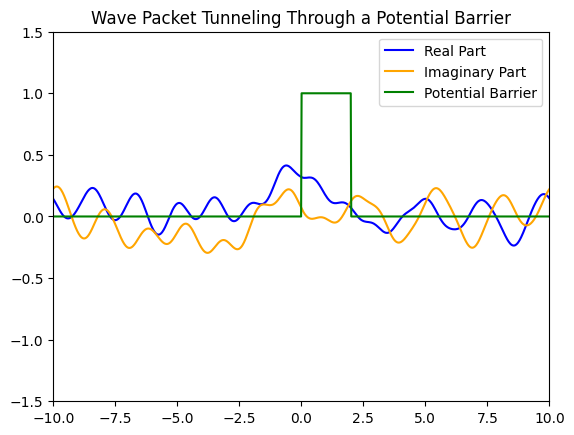

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.fft import fft, ifft

# Constants
hbar = 1.0  # Reduced Planck's constant (normalized)
m = 1.0     # Particle mass (normalized)
L = 2.0     # Width of the potential barrier
V0 = 1.5    # Height of the potential barrier
E = 1.0     # Energy of the incoming wave packet (E < V0 for tunneling)

# Space and time grids
x_min, x_max = -10, 10  # Increased range to avoid boundary reflection
N = 1000  # Number of spatial points
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]
dt = 0.001  # Time step

# Potential barrier
V = np.zeros_like(x)
V[(x >= 0) & (x <= L)] = V0

# Wave packet parameters
k0 = np.sqrt(2 * m * E) / hbar  # Initial wave vector (from energy)
sigma = 0.5  # Width of the wave packet in space
x0 = -5.0    # Initial position of the wave packet

# Initial wave packet (Gaussian in space)
def initial_wave_packet(x, x0, k0, sigma):
    return np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)

psi = initial_wave_packet(x, x0, k0, sigma)

# Fourier space (momentum space) variables
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)

# Time evolution using the split-operator method
def time_evolve(psi, V, dt, hbar, m):
    # Apply half-step in potential space
    psi = psi * np.exp(-1j * V * dt / (2 * hbar))
    
    # Apply full step in momentum space (Fourier domain)
    psi_k = fft(psi)
    psi_k = psi_k * np.exp(-1j * hbar * k**2 * dt / (2 * m))
    psi = ifft(psi_k)
    
    # Apply another half-step in potential space
    psi = psi * np.exp(-1j * V * dt / (2 * hbar))
    
    return psi

# Animation setup
fig, ax = plt.subplots()
ax.set_xlim(x_min, x_max)
ax.set_ylim(-1.5, 1.5)
ax.set_title("Wave Packet Tunneling Through a Potential Barrier")
line_real, = ax.plot(x, np.real(psi), color="blue", label="Real Part")
line_imag, = ax.plot(x, np.imag(psi), color="orange", label="Imaginary Part")
line_potential, = ax.plot(x, V / V0, color="green", label="Potential Barrier")
ax.legend()

# Update function for animation with speed increase by skipping frames
def update(frame):
    global psi
    for _ in range(10):  # Speed up by evolving multiple steps per frame
        psi = time_evolve(psi, V, dt, hbar, m)
    line_real.set_ydata(np.real(psi))
    line_imag.set_ydata(np.imag(psi))
    return line_real, line_imag

# Create animation
ani = FuncAnimation(fig, update, frames=500, interval=20)
ani.save('wave_packet_tunneling_faster.gif', writer='pillow', fps=30)
plt.show()
